# Class handout Questions and Discussion

The following is plots that discuss questions in the class handout for meeting 16.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_16/data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

#################################################################
### a function to fill in sigma for empty spaces in s+ and s- ###
#################################################################

def fill_sigma(df):     
    for z in df.index:
        if np.isnan(df.loc[z,"s_plus"]):
            df.loc[z,"s_plus"] = df.loc[z,"sigma"]
        if np.isnan(df["s_minus"][z]):
            df.loc[z,"s_minus"] = df.loc[z,"sigma"]
    return(df)



################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

#LFER_file = "LFER_HanschLeoTaft.csv"
LFER_file = "LFER_Williams.csv"

data_set = pd.read_csv(github_location_LFER_tables + LFER_file,
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

########################################################
### Fill across sigma values and select substituents ###
########################################################

data_set=fill_sigma(data_set)

### Remove unneeded columns
#data_set.drop(labels = ["TABLE V", "TABLE I"],      #Trim "LFER_HanschLeoTaft.csv" data
data_set.drop(labels = ["Page"],                   #Trim "LFER_Williams.csv"" data
        axis = 1,
        inplace = True)



# print(data_set)




################################################################################
### Read table 1 data. The fields are separated by commas; comments are enabled  ###
################################################################################

data_file = "Table_1_data.csv"

table_data_df = pd.read_csv(github_location + data_file,
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

df = pd.concat([table_data_df, data_set], axis=1, join="inner")

df.sort_values(by=['s_plus'], inplace=True)
display(df)


,k,sigma,s_plus,s_minus
Substituent,,,,
p-CH3,96.3000,-0.14,-0.31,-0.17
p-F,4.1900,0.06,-0.07,-0.03
m-CH3,4.5400,-0.06,-0.06,-0.06
H,1.7100,0.00,0.00,0.00
p-Cl,0.8600,0.23,0.11,0.19
m-Cl,0.0870,0.37,0.37,0.37
m-CF3,0.0446,0.46,0.46,0.46
p-CF3,0.0277,0.53,0.53,0.65


## Calculations and Plot

We now have the data with substituent parameters. We will calculate log(k) and then plot the hammett plot.

In [20]:
df["logk"] = np.log10(df["k"])

display(df)

,k,sigma,s_plus,s_minus,logk
Substituent,,,,,
p-CH3,96.3000,-0.14,-0.31,-0.17,1.983626
p-F,4.1900,0.06,-0.07,-0.03,0.622214
m-CH3,4.5400,-0.06,-0.06,-0.06,0.657056
H,1.7100,0.00,0.00,0.00,0.232996
p-Cl,0.8600,0.23,0.11,0.19,-0.065502
m-Cl,0.0870,0.37,0.37,0.37,-1.060481
m-CF3,0.0446,0.46,0.46,0.46,-1.350665
p-CF3,0.0277,0.53,0.53,0.65,-1.557520


slope1 = -4.0343
intercept1 = 0.452
RSQ_1 = 0.983639



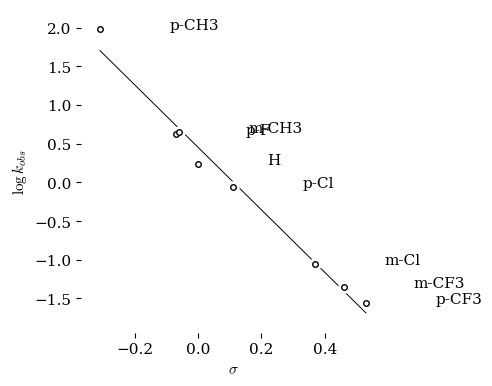

slope = -4.0343
intercept = 0.452
RSQ = 0.983639


In [21]:
from scipy.stats import linregress

sigmatype = "s_plus"          # sigmatype can be one of ["sigma", "s_plus", "s_minus"]

x = df[sigmatype]
y = df["logk"]


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################


style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


#########################################
### Plot the data and the line fit.   ###
#########################################


    
#ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="white", edgecolor = "black", zorder=3)


if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(x,y)
    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='black', zorder=1, linewidth=0.7)
    print(f"slope1 = {linfit.slope:0.4f}")
    print(f"intercept1 = {linfit.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit.rvalue**2):0.6f}")
    print()
    

    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\log{k_{obs}}$", 
       xlabel=r"$\sigma$",
#          xlim=[-.4,.6],                  
#          ylim=[-.85,0.15]
      
      )

ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   
############################
### Print labels on plot ###
############################

if True:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x_loc,y_loc),          # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(50,0),  # distance from text to points (x,y)
                 ha='left')      # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


#####################################
### Print the line fit parameters ###
#####################################

if True:         # Change to True to print a linear line fit results
    print(f"slope = {linfit.slope:0.4f}")
    print(f"intercept = {linfit.intercept:0.3f}")
    print(f"RSQ = {(linfit.rvalue**2):0.6f}")


slope1 = -3.1120
intercept1 = 0.088
RSQ_1 = 0.999402

slope1 = -5.5757
intercept1 = 0.261
RSQ_1 = 0.996892


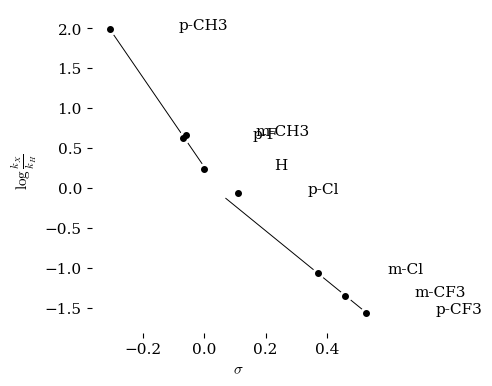

slope = -5.5757
intercept = 0.261
RSQ = 0.996892


In [38]:
### This will pick the section of the plot with the HIGHER sigma values
top4x = x[0:4]     # Python numbers arrays from 0. This will slice of positions 0,1,2 and 3.
top4y = y[0:4]

### This will pick the section of the plot with the LOWER sigma values
bot3x = x[5:8]     # This will slice of positipns 5,6 and 7.
bot3y = y[5:8]



from scipy.stats import linregress


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################


style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


#########################################
### Plot the data and the line fit.   ###
#########################################


    
#ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="black", zorder=3)


if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(bot3x,bot3y)
    linerange = np.array((np.min(bot3x)-0.3, np.max(bot3x)))

    fity = linfit.slope * linerange + linfit.intercept
    ax.plot(linerange, fity, color='black', zorder=1, linewidth=0.7)
    print(f"slope1 = {linfit.slope:0.4f}")
    print(f"intercept1 = {linfit.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit.rvalue**2):0.6f}")
    print()
    linfit = linregress(top4x,top4y)
    fity = linfit.slope * top4x + linfit.intercept
    ax.plot(top4x, fity, color='black', zorder=1, linewidth=0.7)
    print(f"slope1 = {linfit.slope:0.4f}")
    print(f"intercept1 = {linfit.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit.rvalue**2):0.6f}")


    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\log{\frac{k_X}{k_H}}$", 
       xlabel=r"$\sigma$",
#          xlim=[-.4,.6],                  
#          ylim=[-.85,0.15]
      
      )

ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   
############################
### Print labels on plot ###
############################

if True:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x_loc,y_loc),          # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(50,-0),  # distance from text to points (x,y)
                 ha='left')      # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


#####################################
### Print the line fit parameters ###
#####################################

if True:         # Change to True to print a linear line fit results
    print(f"slope = {linfit.slope:0.4f}")
    print(f"intercept = {linfit.intercept:0.3f}")
    print(f"RSQ = {(linfit.rvalue**2):0.6f}")

In [37]:
vl = [np.min(bot3x), np.max(bot3x)]

list(vl)

vl*3

[0.37, 0.53, 0.37, 0.53, 0.37, 0.53]